In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
import pandas as pd
import math
from datetime import datetime
from pyspark.sql import *
from pyspark.sql.functions import col, max as max_
sc = pyspark.SparkContext.getOrCreate()
sqlContext = pyspark.sql.SQLContext(sc)

In [113]:
print("Reading the 'population_india_census2011.csv' dataset to rdd")
population_rdd = sc.textFile("/usr/data/kaggle/covid19-in-india/population_india_census2011.csv")

print("Sanitizing population_rdd...")
headers = population_rdd.first()
population_rdd = population_rdd.filter(lambda line: line != headers)
population_rdd = population_rdd.map(lambda line: line.split(","))
population_rdd = population_rdd.map(lambda line: (line[1], line[2], line[6]))
population_rdd = population_rdd.map(lambda line: (line[0], int(line[1]), math.ceil(float(line[2].split('/')[0]))))

print("Converting population RDD to DataFrame")
population_df = population_rdd.toDF(["state", "population", "density"])

print("Showing the final population data frame:")
population_df.show()

Reading the 'population_india_census2011.csv' dataset to rdd
Sanitizing population_rdd...
Converting population RDD to DataFrame
Showing the final population data frame:
+----------------+----------+-------+
|           state|population|density|
+----------------+----------+-------+
|   Uttar Pradesh| 199812341|    828|
|     Maharashtra| 112374333|    365|
|           Bihar| 104099452|   1102|
|     West Bengal|  91276115|   1029|
|  Madhya Pradesh|  72626809|    236|
|      Tamil Nadu|  72147030|    555|
|       Rajasthan|  68548437|    201|
|       Karnataka|  61095297|    319|
|         Gujarat|  60439692|    308|
|  Andhra Pradesh|  49577103|    303|
|          Odisha|  41974218|    269|
|       Telengana|  35003674|    312|
|          Kerala|  33406061|    859|
|       Jharkhand|  32988134|    414|
|           Assam|  31205576|    397|
|          Punjab|  27743338|    550|
|    Chhattisgarh|  25545198|    189|
|         Haryana|  25351462|    573|
|     Uttarakhand|  10086292|   

In [280]:
print("Reading the 'covid_19_india.csv' dataset to rdd")
raw_covid_file = sc.textFile("/usr/data/kaggle/covid19-in-india/covid_19_india.csv")

print("Sanitizing covid-19 data and preparing covid-19 data")
headers = raw_covid_file.first()
raw_data = raw_covid_file.filter(lambda line: line != headers)
split_covid_data = raw_data.map(lambda line: line.split(","))
sanitized_covid_data = split_covid_data.map(lambda line: (line[3], datetime.strptime(line[1], '%d/%m/%y'), int(line[6]), int(line[7]), int(line[8])))

print("Converting sanitized covid data's RDD to DataFrame")
covid_df = sanitized_covid_data.toDF(["state", "datetime", "cured", "deaths", "confirmed"])

print("Grouping data by 'state' getting the latest (max) date for each state...")
most_recent_date_by_state = covid_df.withColumn("datetime", col("datetime")).\
                                    groupBy("state")\
                                    .agg(max_("datetime"))
most_recent_date_by_state.show()

print("Now we'll join the covid_df (full table) with the partial table of most recent dates by state.")
covid_df_latest_records = df.join(most_recent, [(df.state == most_recent.state) & (df["datetime"]==most_recent["max(datetime)"])])\
.select(df.state, "datetime", "cured", "deaths", "confirmed")

print("Let's display that joined table in a nice Pandas format:")
covid_df_latest_records.toPandas()


Reading the 'covid_19_india.csv' dataset to rdd
Sanitizing covid-19 data and preparing covid-19 data
Converting sanitized covid data's RDD to DataFrame
Grouping data by 'state' getting the latest (max) date for each state...
+-----------------+-------------------+
|            state|      max(datetime)|
+-----------------+-------------------+
|        Nagaland#|2020-04-15 00:00:00|
|         Nagaland|2020-04-14 00:00:00|
|        Karnataka|2020-04-15 00:00:00|
|           Odisha|2020-04-15 00:00:00|
|           Kerala|2020-04-15 00:00:00|
|           Ladakh|2020-04-15 00:00:00|
|       Tamil Nadu|2020-04-15 00:00:00|
|        Telengana|2020-04-15 00:00:00|
|     Chhattisgarh|2020-04-15 00:00:00|
|   Andhra Pradesh|2020-04-15 00:00:00|
|   Madhya Pradesh|2020-04-15 00:00:00|
|           Punjab|2020-04-15 00:00:00|
|          Manipur|2020-04-15 00:00:00|
|              Goa|2020-04-15 00:00:00|
|          Mizoram|2020-04-15 00:00:00|
| Himachal Pradesh|2020-04-15 00:00:00|
|       Puduche

,state,datetime,cured,deaths,confirmed
0,Manipur,2020-04-15,1,0,2
1,Telengana,2020-04-15,120,18,647
2,Tripura,2020-04-15,0,0,2
3,West Bengal,2020-04-15,37,7,213
4,Rajasthan,2020-04-15,147,3,1005
5,Nagaland#,2020-04-15,0,0,0
6,Mizoram,2020-04-15,0,0,1
7,Assam,2020-04-15,0,1,33
8,Jammu and Kashmir,2020-04-15,30,4,278
9,Madhya Pradesh,2020-04-15,64,53,987


In [327]:
print("Joining the population data and the covid_df_latest_records and converting to Pandas object for easy plotting...")
df = covid_df_latest_records.join(population_df, ["state"])
pd = df.toPandas()
pd

Joining the population data and the covid_df_latest_records and converting to Pandas object for easy plotting...


,state,datetime,cured,deaths,confirmed,population,density
0,Nagaland,2020-04-14,0,0,1,1978502,119
1,Karnataka,2020-04-15,75,11,277,61095297,319
2,Odisha,2020-04-15,18,1,60,41974218,269
3,Kerala,2020-04-15,211,3,387,33406061,859
4,Ladakh,2020-04-15,10,0,17,274000,3
5,Tamil Nadu,2020-04-15,81,12,1204,72147030,555
6,Telengana,2020-04-15,120,18,647,35003674,312
7,Chhattisgarh,2020-04-15,13,0,33,25545198,189
8,Andhra Pradesh,2020-04-15,16,9,503,49577103,303
9,Madhya Pradesh,2020-04-15,64,53,987,72626809,236


Now let's try to come out with some insights about the data: 
Correlation between confirmed and cured cases: 0.7477287499967894
Correlation is measured between -1 (for low) and 1 (for high).
As we can see, 0.747 is fairly high and even though this 'insight' is trivial it clearly demonstrate high correlation.

Let's draw the confirmed-cured correlation in a scatter plot...
We can see the strong connection between the two parameters in each state and notice that in the general case:
as high as we go in the x axis, the higher y value the point gets


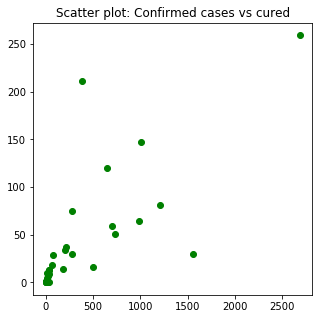

In [197]:
print(f"Now let's try to come out with some insights about the data: \n"
    f"Correlation between confirmed and cured cases: {pd['confirmed'].corr(pd['cured'])}\n"
    f"Correlation is measured between -1 (for low) and 1 (for high).\n"
    f"As we can see, 0.747 is fairly high and even though this 'insight' is trivial it clearly demonstrate high correlation.\n")

print("Let's draw the confirmed-cured correlation in a scatter plot...")
print("We can see the strong connection between the two parameters in each state and notice that in the general case:\n"
        "as high as we go in the x axis, the higher y value the point gets")
plt.figure(figsize=(5,5))
plt.scatter(pd["confirmed"], pd["cured"], color="g")
plt.title('Scatter plot: Confirmed cases vs cured')
plt.show()

Now lets take a look at an even stronger correlation: 
The correlation between Confirmed and Death cases: 0.8511584605156302

As we can see in confirmed-deaths scatter plot, all the dots are more centered and demonstrate a strong linear regression


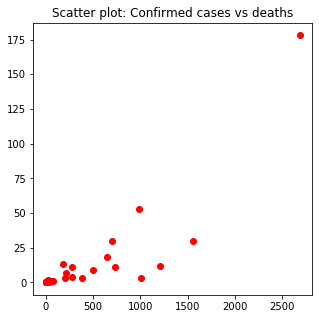

In [198]:
print(f"Now lets take a look at an even stronger correlation: \n"
      f"The correlation between Confirmed and Death cases: {pd['confirmed'].corr(pd['deaths'])}\n") 

print("As we can see in confirmed-deaths scatter plot, all the dots are more centered and demonstrate a strong linear regression")
plt.figure(figsize=(5,5))
plt.scatter(pd["confirmed"], pd["deaths"], color="r")
plt.title('Scatter plot: Confirmed cases vs deaths')
plt.show()

As we can see, the correlation between confirmed cases and the state's density of population does exist, yet relatively loose.
Confirmed-density correlation: 0.2181782035715635
and as a scatter plot:


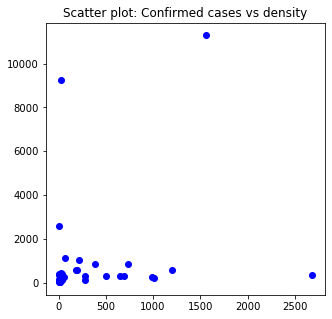

In [199]:
print(f"As we can see, the correlation between confirmed cases and the state's density of population does exist, yet relatively loose.\n"
      f"Confirmed-density correlation: {pd['confirmed'].corr(pd['density'])}\n"
     "and as a scatter plot:") 

plt.figure(figsize=(5,5))
plt.scatter(pd["confirmed"], pd["density"], color="b")
plt.title('Scatter plot: Confirmed cases vs density')
plt.show()

Let's draw all three correlations on the same scatter plot:
Notice that the red 'confirmed+deaths' dots are so densed they are almost totaly covered by the others


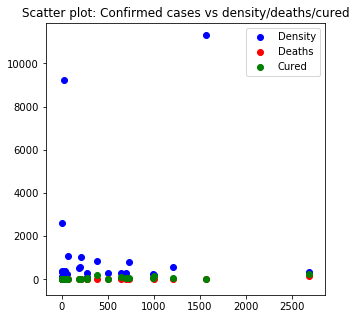

In [200]:
print("Let's draw all three correlations on the same scatter plot:")
print("Notice that the red 'confirmed+deaths' dots are so densed they are almost totaly covered by the others")
plt.figure(figsize=(5,5))
plt.scatter(pd["confirmed"], pd["density"], label="Density", color="b")
plt.scatter(pd["confirmed"], pd["deaths"], label="Deaths", color="r")
plt.scatter(pd["confirmed"], pd["cured"], label="Cured", color="g")
plt.legend()
plt.title('Scatter plot: Confirmed cases vs density/deaths/cured')
plt.show()

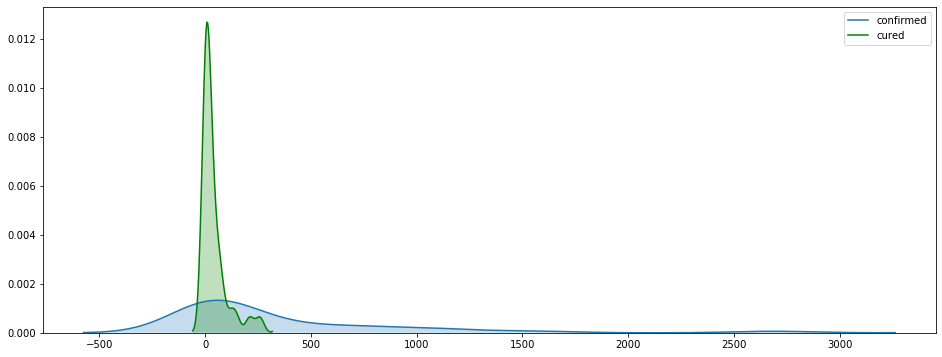

In [203]:
plt.figure(figsize=(16, 6))
sns.kdeplot(pd['confirmed'], shade=True)
sns.kdeplot(pd['cured'], shade=True, color="g")


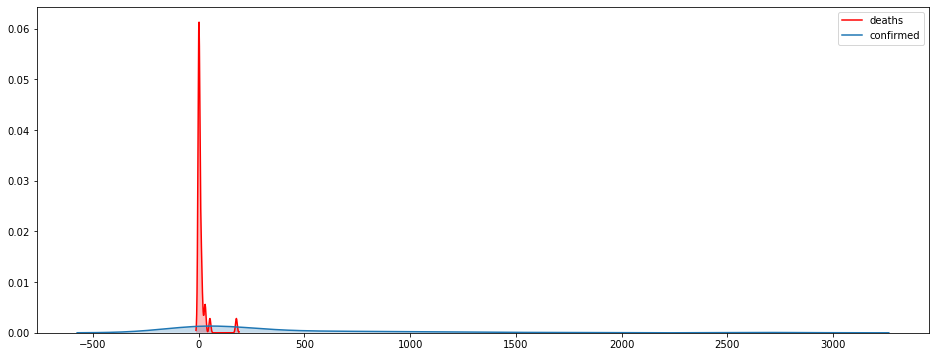

In [226]:
plt.figure(figsize=(16, 6))
sns.kdeplot(pd['deaths'], shade=True, color="r")
sns.kdeplot(pd['confirmed'], shade=True)

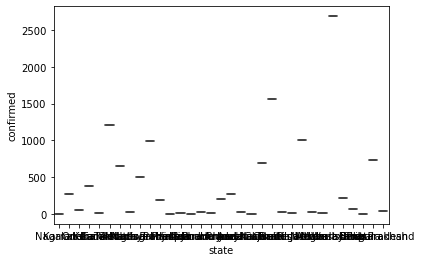

In [230]:
#@TODO - FIND SOME GOOD DATA TO DISPLAY IN BOX PLOT
sns.boxplot(x="state", y="confirmed", data=pd)

Let's take a look at the confirmed cases growth over time:
Delhi state vs the state of Uttarakhand


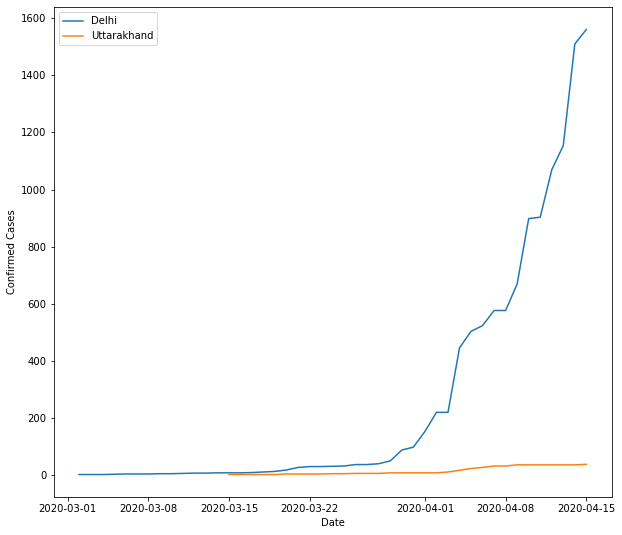

In [322]:
print("Let's take a look at the confirmed cases growth over time:\n"
        "Delhi state vs the state of Uttarakhand")
delhi_covid_overtime = covid_df.filter(covid_df.state=='Delhi').toPandas()
uttarakhand_covid_overtime = covid_df.filter(covid_df.state=='Uttarakhand').toPandas()

plt.figure(figsize=(10, 10))
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

plt.plot(delhi_covid_overtime.datetime, delhi_covid_overtime.confirmed, label="Delhi")
plt.plot(uttarakhand_covid_overtime.datetime, uttarakhand_covid_overtime.confirmed, label="Uttarakhand")
plt.legend()
plt.show()

One might claim that the un-equal growth is highly influenced by the huge difference in population sizes of both states
A glance at this bar chart shows that the difference between Delhi and Uttarakhand is not that big


Text(0.5, 1.0, 'Delhi vs Utarakhand: Population in millions')

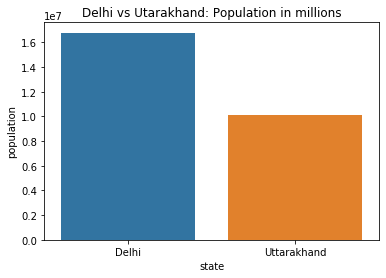

In [383]:
print("One might claim that the un-equal growth is highly influenced by the huge difference in population sizes of both states\n"
     "A glance at this bar chart shows that the difference between Delhi and Uttarakhand is not that big")

mini_df = df.rdd.map(lambda row: (row.state, row.density, row.population)).filter(lambda tup: tup[0] in ["Delhi", "Uttarakhand"]).toDF(["state", "density", "population"]).toPandas()
sns.barplot(x='state', y='population', data=mini_df).set_title("Delhi vs Utarakhand: Population in millions")

However, the Density difference of the two is much larger, and might have a greater influence on the differential growth


Text(0.5, 1.0, 'Delhi vs Utarakhand: Population Density (people per sqr KM)')

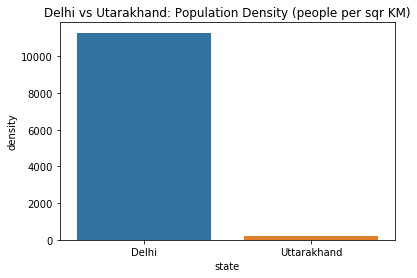

In [385]:
print(f"However, the Density difference of the two is much larger, and might have a greater influence on the differential growth")
sns.barplot(x='state', y='density', data=mini_df).set_title("Delhi vs Utarakhand: Population Density (people per sqr KM)")

In [ ]:
#@TODO - 1. Linear regression model
#@TODO - 2. box plot
#@TODO - 3. google maps API


from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='MV', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)

print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))